# **LISTA 4**

**Edvonaldo Horácio e José Carlos Pinheiro**

**Questão 1 - a)**

In [ ]:
import os
import glob
import nltk
import random
import pandas as pd
import random
import re
import string

folder_path = '/content/tech'

texts = []

for filename in glob.glob(os.path.join(folder_path, '*.txt')):
	with open(filename, 'r') as f_in:
		texts.append([filename.split('/')[-1].split('.')[0], f_in.read()])

df_corpus = pd.DataFrame.from_records(texts)
df_corpus.columns = ["id", "content"]
df_corpus.tail()



,id,content
396,268,IBM frees 500 software patents\n\nComputer gia...
397,282,Dublin hi-tech labs to shut down\n\nDublin's h...
398,220,Britons growing 'digitally obese'\n\nGadget lo...
399,343,Ultra fast wi-fi nears completion\n\nUltra hig...
400,127,Gadget show heralds MP3 season\n\nPartners of ...


In [ ]:
# PRÉ-PROCESSAMENTO
# Analisei visualmente alocando até 10 tópicos por cada método (LDA, SVD e NMF):
# Passos: Pré-processar, transformação vetorial e olhada nas palavras dos tópicos
# Removendo as palavras que contém numeros
df_corpus['content'] = df_corpus['content'].replace(to_replace=r'\w*\d\w*', value='', regex=True)
df_corpus.head(5)

,id,content
0,370,Court mulls file-sharing future\n\nJudges at t...
1,115,Pompeii gets digital make-over\n\nThe old-fash...
2,394,TV's future down the phone line\n\nInternet TV...
3,198,Musical future for phones\n\nAnalyst Bill Thom...
4,074,China 'to overtake US net use'\n\nThe Chinese ...


In [ ]:
# Removendo pontuação
def remove_punctuation(text):
  return  re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

df_corpus['content'] = df_corpus['content'].apply(remove_punctuation) # Removendo pontuação

In [ ]:
# Tornando em minúscula
df_corpus.content = df_corpus.content.str.lower()
df_corpus.content

0      court mulls file sharing future\n\njudges at t...
1      pompeii gets digital make over\n\nthe old fash...
2      tv s future down the phone line\n\ninternet tv...
3      musical future for phones\n\nanalyst bill thom...
4      china  to overtake us net use \n\nthe chinese ...
                             ...                        
396    ibm frees  software patents\n\ncomputer giant ...
397    dublin hi tech labs to shut down\n\ndublin s h...
398    britons growing  digitally obese \n\ngadget lo...
399    ultra fast wi fi nears completion\n\nultra hig...
400    gadget show heralds  season\n\npartners of tho...
Name: content, Length: 401, dtype: object

In [ ]:
# Representação com TF-IDF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

df_corpus_tfidf = TfidfVectorizer(stop_words="english")
x_df_corpus_tfidf = df_corpus_tfidf.fit_transform(df_corpus.content).toarray()
pd_df_corpus_tfidf = pd.DataFrame(x_df_corpus_tfidf, columns=df_corpus_tfidf.get_feature_names())
print(pd_df_corpus_tfidf.shape)
print(pd_df_corpus_tfidf)

(401, 11337)
     aaa  aaas  aac  aadc  aarhus  ...  zonealarm  zones  zoom  zooms  zurich
0    0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
1    0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
2    0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
3    0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
4    0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
..   ...   ...  ...   ...     ...  ...        ...    ...   ...    ...     ...
396  0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
397  0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
398  0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
399  0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0
400  0.0   0.0  0.0   0.0     0.0  ...        0.0    0.0   0.0    0.0     0.0

[401 rows x 11337 columns]


In [ ]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation

lda_topics = []

x = df_corpus_tfidf.fit_transform(df_corpus.content)

# Até 10 tópicos
for n_topics in range(3, 11, 1):
  lda_aux = LatentDirichletAllocation(n_components=n_topics, random_state=42, learning_method='batch')
  lda_aux_topics = lda_aux.fit_transform(x)
  lda_topics.append(lda_aux_topics)

In [ ]:
for rows in range(0, 8, 1):
  print('', rows+3, 'topics: ', lda_topics[rows][0])

 3 topics:  [0.94105313 0.02815352 0.03079335]
 4 topics:  [0.02053693 0.02054567 0.02054444 0.93837297]
 5 topics:  [0.0163212  0.01632381 0.01632342 0.01632295 0.93470861]
 6 topics:  [0.01357973 0.01357981 0.01358013 0.93209496 0.01357959 0.01358579]
 7 topics:  [0.01163524 0.01163592 0.0116353  0.93018622 0.01163579 0.0116353
 0.01163622]
 8 topics:  [0.01018059 0.01018065 0.01018358 0.01018116 0.92854833 0.01018089
 0.01036416 0.01018064]
 9 topics:  [0.00904877 0.1581089  0.00904874 0.04341614 0.0090562  0.31529339
 0.43792476 0.0090491  0.009054  ]
 10 topics:  [0.00814938 0.25944552 0.00814372 0.67534887 0.00814589 0.00814921
 0.00814643 0.00814429 0.00815869 0.00816801]


In [ ]:
# SVD
from sklearn.decomposition import TruncatedSVD

svd_topics = []

# Até 10 tópicos
for n_topics in range(3, 11, 1):
  svd_aux = TruncatedSVD(n_components=n_topics, algorithm='randomized', random_state=42)
  svd_aux_topics = svd_aux.fit(x)
  svd_topics.append(svd_aux_topics)


In [ ]:
terms_svd = df_corpus_tfidf.get_feature_names()

for index in range(0, 8, 1):
  print('', index+3, 'topics')
  print("")
  for i, comp in enumerate(svd_topics[index].components_):
    terms_comp = zip(terms_svd, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic " +str(i)+ ": ")
    for t in sorted_terms:
      print(t[0])
    print("")

 3 topics

Topic 0: 
said
mobile
people
music
phone
games
digital

Topic 1: 
virus
spyware
security
software
microsoft
search
mail

Topic 2: 
games
nintendo
game
ds
sony
microsoft
console

 4 topics

Topic 0: 
said
mobile
people
music
phone
games
digital

Topic 1: 
virus
spyware
security
software
microsoft
search
mail

Topic 2: 
games
nintendo
game
ds
sony
console
microsoft

Topic 3: 
search
broadband
google
bt
yahoo
web
tv

 5 topics

Topic 0: 
said
mobile
people
music
phone
games
digital

Topic 1: 
virus
spyware
security
software
microsoft
search
mail

Topic 2: 
games
nintendo
game
ds
sony
console
microsoft

Topic 3: 
search
broadband
google
bt
tv
yahoo
web

Topic 4: 
broadband
bt
nintendo
game
ds
games
uk

 6 topics

Topic 0: 
said
mobile
people
music
phone
games
digital

Topic 1: 
virus
spyware
security
software
microsoft
search
mail

Topic 2: 
games
nintendo
game
ds
sony
console
microsoft

Topic 3: 
search
broadband
google
bt
yahoo
web
tv

Topic 4: 
broadband
bt
game
nintendo
game

In [ ]:
# NMF
from sklearn.decomposition import NMF

nmf_topics = []

# Até 10 tópicos
for n_topics in range(3, 11, 1):
  nmf_aux = NMF(n_components=n_topics)
  nmf_aux_topics = nmf_aux.fit(x)
  nmf_topics.append(nmf_aux_topics)

In [ ]:
# Topics
terms_nmf = df_corpus_tfidf.get_feature_names()

for index in range(0, 8, 1):
  print('', index+3, 'topics')
  print("")
  for i, comp in enumerate(nmf_topics[index].components_):
    terms_comp = zip(terms_nmf, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic " +str(i)+ ": ")
    for t in sorted_terms:
      print(t[0])
    print("")

 3 topics

Topic 0: 
mobile
phone
music
broadband
people
said
tv

Topic 1: 
software
virus
microsoft
security
spyware
search
said

Topic 2: 
games
game
nintendo
sony
ds
gaming
console

 4 topics

Topic 0: 
mobile
music
phone
phones
said
digital
mobiles

Topic 1: 
virus
software
security
spyware
microsoft
mail
anti

Topic 2: 
games
game
nintendo
sony
ds
gaming
console

Topic 3: 
broadband
search
bt
net
people
tv
said

 5 topics

Topic 0: 
mobile
phone
broadband
phones
bt
people
mobiles

Topic 1: 
virus
spyware
security
software
microsoft
anti
mail

Topic 2: 
games
game
nintendo
ds
sony
gaming
console

Topic 3: 
search
google
yahoo
desktop
web
jeeves
blogs

Topic 4: 
music
digital
apple
players
said
ipod
content

 6 topics

Topic 0: 
mobile
phone
phones
mobiles
said
people
handsets

Topic 1: 
virus
spyware
security
software
microsoft
anti
mail

Topic 2: 
games
game
nintendo
ds
sony
gaming
console

Topic 3: 
broadband
bt
net
uk
tv
people
million

Topic 4: 
music
digital
apple
players
said

Vemos que pelos 3 algorimos, especialmente o LDA, 4 tópicos é uma quantidade ótima, uma vez que acima disso, há semelhanças consideráveis.

**Questão 1 - b)**

In [ ]:
# LDA
lda_topics_words = LatentDirichletAllocation(n_components=4, random_state=42, learning_method='batch')

lda_words = lda_topics_words.fit(x)

# Topics
words_lda = df_corpus_tfidf.get_feature_names()
sorted_terms_lda = []
for i, comp in enumerate(lda_words.components_):
  terms_comp = zip(words_lda, comp)
  sorted_terms_aux = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
  sorted_terms_lda.append(sorted_terms_aux)

In [ ]:
# Topics LDA
print("LDA method")
for i in range(4):
  print("Topic ", i)
  for j in range(5):
    print("Word ", j, ":", sorted_terms_lda[i][j][0])
  print("")

LDA method
Topic  0
Word  0 : virus
Word  1 : spam
Word  2 : spyware
Word  3 : attacks
Word  4 : mail

Topic  1
Word  0 : domains
Word  1 : icann
Word  2 : proposal
Word  3 : varying
Word  4 : administrative

Topic  2
Word  0 : cabir
Word  1 : seafarers
Word  2 : wong
Word  3 : bloglines
Word  4 : zafi

Topic  3
Word  0 : said
Word  1 : people
Word  2 : mobile
Word  3 : games
Word  4 : music



In [ ]:
# SVD
words_svd = df_corpus_tfidf.get_feature_names()
sorted_terms_svd = []
for i, comp in enumerate(svd_topics[1].components_):
  terms_comp = zip(words_svd, comp)
  sorted_terms_aux = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
  sorted_terms_svd.append(sorted_terms_aux)

# Topic SVD
print("SVD method")
for i in range(4):
  print("Topic ", i)
  for j in range(5):
    print("Word ", j, ":", sorted_terms_svd[i][j][0])
  print("")

SVD method
Topic  0
Word  0 : said
Word  1 : mobile
Word  2 : people
Word  3 : music
Word  4 : phone

Topic  1
Word  0 : virus
Word  1 : spyware
Word  2 : security
Word  3 : software
Word  4 : microsoft

Topic  2
Word  0 : games
Word  1 : nintendo
Word  2 : game
Word  3 : ds
Word  4 : sony

Topic  3
Word  0 : search
Word  1 : broadband
Word  2 : google
Word  3 : bt
Word  4 : yahoo



In [ ]:
# NMF
words_nmf = df_corpus_tfidf.get_feature_names()
sorted_terms_nmf = []
for i, comp in enumerate(nmf_topics[1].components_):
  terms_comp = zip(words_nmf, comp)
  sorted_terms_aux = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
  sorted_terms_nmf.append(sorted_terms_aux)

# Topic NMF
print("NMF method")
for i in range(4):
  print("Topic ", i)
  for j in range(5):
    print("Word ", j, ":", sorted_terms_nmf[i][j][0])
  print("")

NMF method
Topic  0
Word  0 : mobile
Word  1 : music
Word  2 : phone
Word  3 : phones
Word  4 : said

Topic  1
Word  0 : virus
Word  1 : software
Word  2 : security
Word  3 : spyware
Word  4 : microsoft

Topic  2
Word  0 : games
Word  1 : game
Word  2 : nintendo
Word  3 : sony
Word  4 : ds

Topic  3
Word  0 : broadband
Word  1 : search
Word  2 : bt
Word  3 : net
Word  4 : people



**Questão 1 - c)**

In [ ]:
# Escolhendo aleatoriamente 3 textos no data frame
df_5_texts = df_corpus.sample(n=5)

print(df_5_texts)

      id                                            content
155  047  millions buy  players in us\n\none in  adult a...
253  310  latest opera browser gets vocal\n\nnet browser...
234  268  ibm frees  software patents\n\ncomputer giant ...
23   108  search wars hit desktop pcs\n\nanother front i...
232  015  xbox power cable  fire fear \n\nmicrosoft has ...


In [ ]:
# TF-IDF
df_5_tfidf = TfidfVectorizer(stop_words="english")
x_df_5_tfidf = df_5_tfidf.fit_transform(df_5_texts.content).toarray()
pd_df_5_tfidf = pd.DataFrame(x_df_5_tfidf, columns=df_5_tfidf.get_feature_names())
print(pd_df_5_tfidf.shape)
x_5 = df_5_tfidf.fit_transform(df_5_texts.content)

(5, 609)


In [ ]:
# LDA
lda_5_twords = LatentDirichletAllocation(n_components=3, random_state=42, learning_method='batch')

lda_twords = lda_5_twords.fit(x_5)

# Topics
words_lda_5 = df_5_tfidf.get_feature_names()
terms_lda_5 = []
for i, comp in enumerate(lda_5_twords.components_):
  terms_comp = zip(words_lda_5, comp)
  sorted_terms_aux = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
  terms_lda_5.append(sorted_terms_aux)

In [ ]:
# Topics LDA
print("LDA method - 3 topics")
for i in range(3):
  print("Topic ", i)
  for j in range(5):
    print("Word ", j, ":", terms_lda_5[i][j][0])
  print("")

LDA method - 3 topics
Topic  0
Word  0 : search
Word  1 : microsoft
Word  2 : desktop
Word  3 : said
Word  4 : damage

Topic  1
Word  0 : players
Word  1 : patents
Word  2 : ibm
Word  3 : survey
Word  4 : software

Topic  2
Word  0 : opera
Word  1 : voice
Word  2 : browser
Word  3 : people
Word  4 : appeal



In [ ]:
# SVD
svd_5_twords = TruncatedSVD(n_components=3, random_state=42)

svd_twords = svd_5_twords.fit(x_5)

# Topics
words_svd_5 = df_5_tfidf.get_feature_names()
terms_svd_5 = []
for i, comp in enumerate(svd_5_twords.components_):
  terms_comp = zip(words_svd_5, comp)
  sorted_terms_aux = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
  terms_svd_5.append(sorted_terms_aux)

In [ ]:
# Topics SVD
print("SVD method - 3 topics")
for i in range(3):
  print("Topic ", i)
  for j in range(5):
    print("Word ", j, ":", terms_svd_5[i][j][0])
  print("")

SVD method - 3 topics
Topic  0
Word  0 : patents
Word  1 : search
Word  2 : software
Word  3 : ibm
Word  4 : said

Topic  1
Word  0 : players
Word  1 : survey
Word  2 : opera
Word  3 : aged
Word  4 : american

Topic  2
Word  0 : players
Word  1 : damage
Word  2 : xbox
Word  3 : cables
Word  4 : consoles



In [ ]:
# NMF
nmf_5_twords = TruncatedSVD(n_components=3, random_state=42)

nmf_twords = nmf_5_twords.fit(x_5)

# Topics
words_nmf_5 = df_5_tfidf.get_feature_names()
terms_nmf_5 = []
for i, comp in enumerate(nmf_5_twords.components_):
  terms_comp = zip(words_nmf_5, comp)
  sorted_terms_aux = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
  terms_nmf_5.append(sorted_terms_aux)

In [ ]:
# Topics NMF
print("NMF method - 3 topics")
for i in range(3):
  print("Topic ", i)
  for j in range(5):
    print("Word ", j, ":", terms_nmf_5[i][j][0])
  print("")

NMF method - 3 topics
Topic  0
Word  0 : patents
Word  1 : search
Word  2 : software
Word  3 : ibm
Word  4 : said

Topic  1
Word  0 : players
Word  1 : survey
Word  2 : opera
Word  3 : aged
Word  4 : american

Topic  2
Word  0 : players
Word  1 : damage
Word  2 : xbox
Word  3 : cables
Word  4 : consoles



**Questão 1 - d)**

Escolhendo aleatoriamente 5 textos na base (os com id igual a 015, 047, 108 268 e 310), ao observar os textos e fazer uma avaliação manual notou-se que o SVD e o NMF apresentaram resultados iguais nas 5 palavras relevantes dos 3 tópicos. 

Estes 2 últimos apresentaram os resultados mais consistentes com os conteúdos dos 5 textos.

**Questão 2 - a)**

In [ ]:
# Passos:
# Aplica o PCA (TruncatedSVD) para reduzir as dimensões
# Após reduzir as dimensões, aplica o kmeans para achar o valor de k ótimo
# Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

df_corpus_tfidf = TfidfVectorizer(stop_words="english")
x_pca = df_corpus_tfidf.fit_transform(df_corpus.content).toarray()

pd_df_corpus_tfidf = pd.DataFrame(x_pca, columns=df_corpus_tfidf.get_feature_names())
print(pd_df_corpus_tfidf.shape)

NameError: ignored

In [ ]:
from sklearn.decomposition import TruncatedSVD
# PCA variance - SVD
svd_variance_pca = TruncatedSVD(n_components=280, random_state=42)

svd_pca_words = svd_variance_pca.fit(x_pca)

print("Total variance: ", round(100 * svd_pca_words.explained_variance_ratio_.sum(),2), "%")
print("Dimension after reduction: ", 280) # after reduction: n_components

Total variance:  95.65 %
Dimension after reduction:  280


**Questão 2 - b)**

In [ ]:
# Passos: aplica o kmeans no x_pca reduzido (com 280 dimensões)
# Kmeans após a redução
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import time

start_time = time.time()

#n_cluster = int(4)

#svd_pca_kmeans = KMeans(n_clusters=n_cluster, random_state=42)

# Aplicando svd no x_pca (tfidf)
svd_variance_data = svd_variance_pca.fit_transform(x_pca)

# topics_kmeans = svd_pca_kmeans.fit(svd_variance_data)
k_cluster = range(1,326)

def koptim_elbow(svd_variance_data_param):
  distortions_ = [] 
  inertias = [] 
  map_distortions = {} 
  map_inertia = {} 

  for k in k_cluster: 
    #Building and fitting the model 
    svd_pca_kmeans = KMeans(n_clusters=k) #.fit(svd_variance_data_param) 
    svd_pca_kmeans.fit(svd_variance_data_param)     
      
    
    #distortions_.append(sum(np.min(cdist(svd_variance_data_param,
    #                                      svd_pca_kmeans.cluster_centers_,
    #                                      'euclidean'),axis=1)) / svd_variance_data_param.shape[0]) 
    inertias.append(svd_pca_kmeans.inertia_) 
  
    #map_distortions[k] = sum(np.min(cdist(svd_variance_data_param, 
    #                                      svd_pca_kmeans.cluster_centers_, 
    #                                      'euclidean'),axis=1)) / svd_variance_data_param.shape[0] 
    map_inertia[k] = svd_pca_kmeans.inertia_

  return (inertias, map_inertia)


inertias, map_inertia = koptim_elbow(svd_variance_data)

seconds_time_code = (time.time() - start_time)
print("Time execution: ", round(seconds_time_code, 2), "seconds.")

Time execution:  578.27 seconds.


In [ ]:
# Tempo de execução
def seconds_transform(seconds_time):
  hours = int(seconds_time/3600)
  rest_1 = seconds_time%3600
  minutes = int(rest_1/60)
  seconds = rest_1 - 60*minutes
  #print(seconds)
  print("", (hours), "h ", (minutes), "min ", round(seconds,2), " s")

print(seconds_transform(seconds_time_code))

 0 h  9 min  38.27  s
None


In [ ]:
#plt.plot(k_cluster, distortions_, 'bx-') 
#plt.xlabel('Values of k_cluster') 
#plt.ylabel('Distortion') 
#plt.title('The Elbow Method using Distortion') 
#plt.show() 

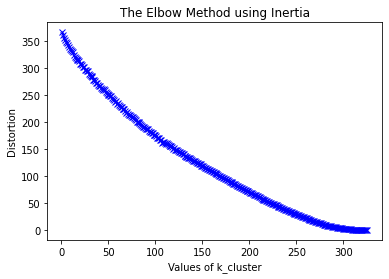

In [ ]:
plt.plot(k_cluster, inertias, 'bx-') 
plt.xlabel('Values of k_cluster') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Conforme o gráfico acima, o "cotovelo" está em aproximadamente k = 326.

**Questão 3 - a)**

In [ ]:
# Passos:
# Usa o TSNE com k=326 (k ótimo)
# Usa o UMAP com k=326 (primeiro com o TruncatedSVD para reduzir as dimensões e depois com o UMAP)
# TSNE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import time
import matplotlib.pyplot as plt
import numpy as np

start_tsne = time.time()

pca_326 = PCA(n_components=326).fit_transform(x_pca)

tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=400).fit_transform(pca_326)

time_tsne = (time.time() - start_tsne)
print("Time execution: ", round(time_tsne, 2), "seconds.")

Time execution:  2.83 seconds.


In [ ]:
tsne_col = []
for i in range(0,401):
  tsne_col.append(tsne[i].sum())

tsne_colors = np.array(tsne_col)

Text(0, 0.5, 'tsne_2')

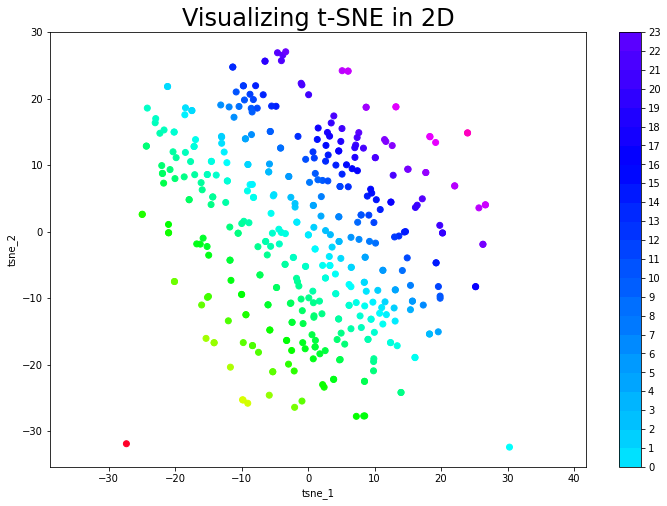

In [ ]:
# Plot tsne
fig = plt.figure(figsize=(12,8))
plt.scatter(tsne[:, 0], tsne[:, 1], c=tsne_colors, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
plt.title('Visualizing t-SNE in 2D', fontsize=24);
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')

In [ ]:
# UMAP
import umap

start_tsne = time.time()

umap_326 = umap.UMAP(n_components=326).fit_transform(x_pca)

time_tsne = (time.time() - start_tsne)
print("Time execution: ", round(time_tsne, 2), "seconds.")

Time execution:  6.16 seconds.


In [ ]:
print(umap_326.shape)
umap_col = []
for i in range(0,401):
  umap_col.append(umap_326[i].sum())

umap_colors = np.array(umap_col)

(401, 326)


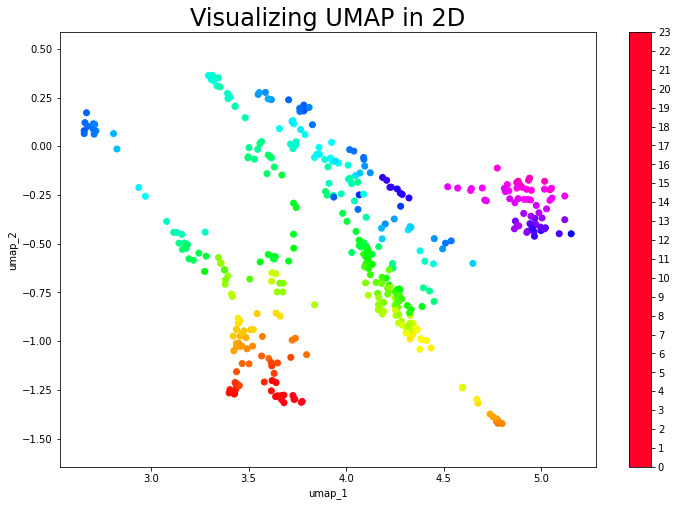

In [ ]:
# Visualising UMAP in 2d
fig = plt.figure(figsize=(12,8))
plt.scatter(umap_326[:, 0], umap_326[:, 1], c=umap_colors, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
plt.xlabel('umap_1')
plt.ylabel('umap_2')
plt.title('Visualizing UMAP in 2D', fontsize=24);

**Questão 3 - b)**
Tempo de execução do TSNE: 2.83 seconds.
Tempo de execução do UMAP: 6.16 seconds.

Neste caso, o primeiro algoritmo se mostrou quase duas vezes mais rápido.